In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_user_attributes = _hex_json.loads("{}")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"UTC\"")

In [ ]:
hex_project_id = _hex_json.loads("\"7041c6c2-16e5-4cff-8058-bb30c0bcf768\"")

In [ ]:
hex_project_name = _hex_json.loads("\"Iris Assignment (Python)\"")

In [ ]:
hex_status = _hex_json.loads("\"Completed\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This dataset is from the Consumer Expenditure Survey by the U.S. Bureau of Labor Statistics — specifically, it is a small subset of the 2023 data for "Quintiles of income before taxes" from [this page](https://www.bls.gov/cex/tables/calendar-year/mean-item-share-average-standard-error.htm). All amounts are in U.S. dollars.

- `income_quintile`: five levels, from the lowest-income 20% of the population to the highest-income.
- `annual_income`: mean annual income, after taxes, for the households in that quintile.
- `food_spending_total`: mean annual amount spent on all food (this is the sum of the next two columns).
- `food_spending_home`: mean annual amount spent on food prepared at home.
- `food_spending_away`: mean annual amount spent on food prepared away from home (e.g. at restaurants).

You may transform this basic dataset (for example, to pivot it or calculate percentages) in order to create a more (or less!) effective visualization.

In [ ]:
food_spending = pd.read_csv("food_spending.csv")
food_spending

,income_quintile,annual_income,food_spending_total,food_spending_home,food_spending_away
0,Lowest,16171,5278,3707,1571
1,Second,40621,7100,4680,2421
2,Middle,66606,8989,5756,3234
3,Fourth,104559,11550,6917,4633
4,Highest,211042,16996,9198,7797


### Good Visualization:



In [ ]:
sns.set_style("whitegrid")

First, I want to show the value and trend of 2 categories of food spending as well as the total, so I started with line plot.

While it does make sense, it's not intuitive enough, because the total should be equal to the two food spending.



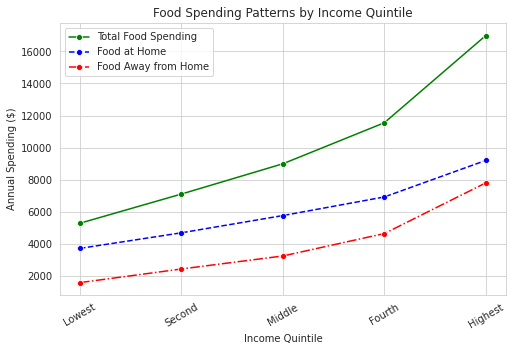

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(x=food_spending["income_quintile"], y=food_spending["food_spending_total"], marker="o", label="Total Food Spending", color="green", ax=ax)
sns.lineplot(x=food_spending["income_quintile"], y=food_spending["food_spending_home"], marker="o", linestyle="--", label="Food at Home", color="blue", ax=ax)
sns.lineplot(x=food_spending["income_quintile"], y=food_spending["food_spending_away"], marker="o", linestyle="-.", label="Food Away from Home", color="red", ax=ax)

ax.set_ylabel("Annual Spending ($)")
ax.set_xlabel("Income Quintile")
ax.set_title("Food Spending Patterns by Income Quintile")
ax.legend()
plt.xticks(rotation=30)
plt.show()

Then, I tried the stacked bar plot method to show the relationship between total food spending and the two categories of spendings. This is better than the first one, but make it hard to compare the value of  "food_spending_away" (orange bar).



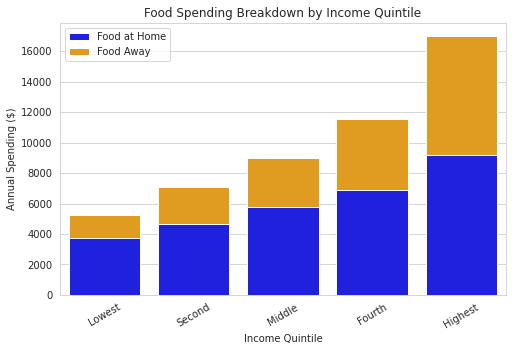

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
bottom = food_spending["food_spending_home"]
sns.barplot(x=food_spending["income_quintile"], y=food_spending["food_spending_home"], color="blue", label="Food at Home", ax=ax)
sns.barplot(x=food_spending["income_quintile"], y=food_spending["food_spending_away"], bottom=bottom, color="orange", label="Food Away", ax=ax)

ax.set_ylabel("Annual Spending ($)")
ax.set_xlabel("Income Quintile")
ax.set_title("Food Spending Breakdown by Income Quintile")
ax.legend()
plt.xticks(rotation=30)
plt.show()

- **Total Food spending**, rises with higher income quintiles, from “Lowest” to “Highest.”
- Within each quintile, the ,**stacked bars**, break down that total into ,**Food at Home**, (the lower blue segment) and ,**Food Away**, (the top orange segment).
- You can quickly compare how each quintile allocates spending on food in vs. out of the home, and also see ,**how much more**, higher-income groups spend overall.



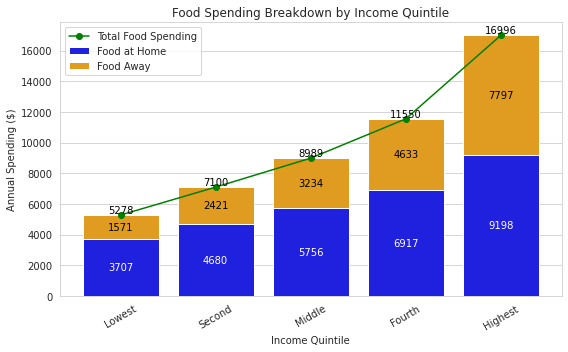

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

# Plot stacked bars
sns.barplot(
    data=food_spending,
    x="income_quintile",
    y="food_spending_home",
    color="blue",
    ax=ax,
    label="Food at Home"
)
sns.barplot(
    data=food_spending,
    x="income_quintile",
    y="food_spending_away",
    bottom=food_spending["food_spending_home"],
    color="orange",
    ax=ax,
    label="Food Away"
)

# Retrieve the bar containers (blue is first, orange is second)
blue_bars   = ax.containers[0]
orange_bars = ax.containers[1]

# Center the numeric labels on each bar
# - White text on blue bars for visibility
# - Black text on orange bars
ax.bar_label(blue_bars,   fmt='%.0f', label_type='center', color='white')
ax.bar_label(orange_bars, fmt='%.0f', label_type='center', color='black')

# Overlay the line for total spending
ax.plot(
    food_spending["income_quintile"],
    food_spending["food_spending_total"],
    color='green',
    marker='o',
    label='Total Food Spending'
)

# Label each point on the green line
for x, y in zip(food_spending["income_quintile"], food_spending["food_spending_total"]):
    ax.text(x, y, f"{y:.0f}", ha='center', va='bottom', color='black')

# Titles and legend
ax.set_xlabel("Income Quintile")
ax.set_ylabel("Annual Spending ($)")
ax.set_title("Food Spending Breakdown by Income Quintile")
ax.legend()

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### **Bad Visualizations**



#### Wrong/misleading chart type 1:



The total of food spendings of all income quintile (100% of the pie chart) is somehow useful to understand the difference between each category, but the percentage doesn't directly help us to understand the exact amount of money  spent on food for each income quintile. Additionally, the breakdown of 2 types of food spendings are not included here, making the pie chart less informative.



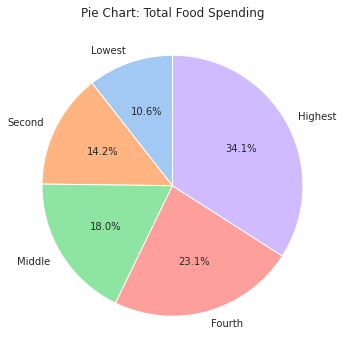

In [ ]:
#Pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(food_spending["food_spending_total"], labels=food_spending["income_quintile"], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
ax.set_title("Pie Chart: Total Food Spending")
plt.show()

#### Wrong/misleading chart type 2:



The stacked bar plot is useful to help understanding of the value of each category.
However, “Total Food Spending” bar is misleading, because it shouldn’t be presented as a separate bar stacked on top of the two spending categories it includes.

Also, the choice of gradient color doesn't make any sense here.



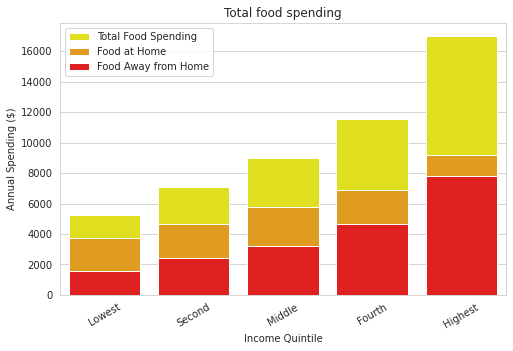

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=food_spending["income_quintile"], y=food_spending["food_spending_total"], color="yellow", label="Total Food Spending", ax=ax)
sns.barplot(x=food_spending["income_quintile"], y=food_spending["food_spending_home"], color="orange", label="Food at Home", ax=ax)
sns.barplot(x=food_spending["income_quintile"], y=food_spending["food_spending_away"], color="red", label="Food Away from Home", ax=ax)

ax.set_ylabel("Annual Spending ($)")
ax.set_xlabel("Income Quintile")
ax.set_title("Total food spending")
ax.legend()
plt.xticks(rotation=30)
plt.show()

#### Wrong/misleading chart Final:



Final "Bad" Chart:

1. **Hard-to-Distinguish Slices**
  - All slices use nearly the same shade of gray, making it difficult to tell them apart at a glance.
2. **Difficult Value Comparisons**
  - It is inherently hard to compare the relative size of slices in a pie chart, especially when there are multiple slices of similar sizes.
3. **Excessive ‘Exploding’**
  - Each slice is “pulled out” from the center, which adds visual clutter but no real benefit in understanding the data.
4. **Overly Precise Percent Labels**
  - Showing percentages to five decimal places clutters the chart without adding meaningful insight.
5. **Redundant Legend**
  - The legend uses the same nearly indistinguishable grays as the slices, making it difficult to match labels to slices.
  - The labels on the slices themselves are already present, so a large legend is mostly redundant.



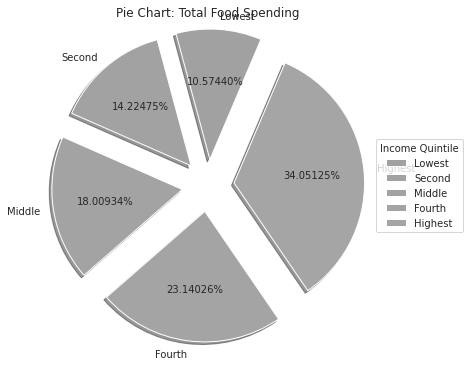

In [ ]:
import matplotlib.pyplot as plt

values = food_spending["food_spending_total"].values
labels = food_spending["income_quintile"].values

fig, ax = plt.subplots(figsize=(6, 6))

# Very similar shades of gray to make slices hard to distinguish
colors = ["#a1a1a1", "#a2a2a2", "#a3a3a3", "#a4a4a4", "#a5a5a5"]

explode = [0.2] * len(values)

wedges, text_labels, autotexts = ax.pie(
    values,
    labels=labels,
    colors=colors,
    explode=explode,
    autopct='%1.5f%%',  
    shadow=True,        
    startangle=67,     
)

ax.legend(wedges, labels, title="Income Quintile", loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Pie Chart: Total Food Spending")

plt.show()
